In [1]:
#Importing the libraries
import numpy as np
import torch as th
import torch 
from transformers import BertTokenizer, BertModel
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


device = th.device('cuda') if th.cuda.is_available() else th.device('cpu')
print(f'Using device: {device}')

/Users/vedikachauhan/Desktop/NLP_project/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


In [2]:
#Split the data into training and testing sets (FOR NEW TRAINIGS FROM HERE)

path=r"Data_set/best_200songs_per20artist.csv"
#path=r"C:/Users/JOSDA/Desktop/Autonomous systems/Second semester/NLP/Project/GIT/NLP_project/Data_set/best_100songs_per50artist_cleaned.csv"

#load the data
data = pd.read_csv(path)

# Convert the embeddings from strings to lists
data['embeddings'] = data['embeddings'].apply(ast.literal_eval)

# Convert the labels from strings to lists
embeddings = th.tensor(data['embeddings'].tolist())

# Convert the labels from strings to lists   
labels = th.tensor(data['labels'].tolist())


# Split the data into training and testing sets
train_embeddings, test_embeddings, train_labels, test_labels = train_test_split(
    embeddings, labels, test_size=0.2, random_state=42, stratify=labels
)

# Verificar la forma de los conjuntos
print("Train embeddings shape:", train_embeddings.shape)
print("Test embeddings shape:", test_embeddings.shape)
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

### Artist Classificator

In [ ]:
# SIMPLE CLASSIFIER
#MODELS

# Classifier with one hidden layer, ReLU activation, and an output layer
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


# IMPROVED CLASSIFIER 
# with two hidden layers, ReLU activation and dropout, and an output layer
#dropout is used to prevent overfitting

class ImprovedClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)  
        self.relu1 = nn.ReLU() 
        self.dropout1 = nn.Dropout(0.5)  
        self.fc2 = nn.Linear(512, 256)  
        self.relu2 = nn.ReLU() 
        self.dropout2 = nn.Dropout(0.5) 
        self.fc3 = nn.Linear(256, num_classes)  
    
    def forward(self, x):
        x = self.fc1(x)  
        x = self.relu1(x)  
        x = self.dropout1(x)  
        x = self.fc2(x)  # hidden layer
        x = self.relu2(x)  
        x = self.dropout2(x)  
        x = self.fc3(x)  # output layer
        return x

# ENHANCED CLASSIFIER    
# here we have added a third hidden layer to the model
class EnhancedClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(EnhancedClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        return x    




# Set the input size and number of classes
input_size = train_embeddings.shape[1]  # size of the embeddings
num_classes = len(set(labels.tolist()))  # number of unique labels(artist in our case)

# Select the model to use
#model = SimpleClassifier(input_size, num_classes).to(device)
#model = ImprovedClassifier(input_size, num_classes).to(device)
model = EnhancedClassifier(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)



In [ ]:
# Train the model 
num_epochs = 350
for epoch in range(num_epochs):
    model.train()
    outputs = model(train_embeddings.to(device))
    loss = criterion(outputs, train_labels.to(device))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
#Evaluate the model and calculate the accuracy, confusion matrix and display it

# Evaluate the model
model.eval()
with th.no_grad():
    test_outputs = model(test_embeddings.to(device))
    _, predicted = th.max(test_outputs, 1)
    correct = (predicted == test_labels.to(device)).sum().item()
    accuracy = correct / test_labels.size(0)
    print(f'Accuracy on test set: {accuracy:.4f}')

# Confusion matrix
predicted = predicted.cpu().numpy()
test_labels = test_labels.cpu().numpy()

cm = confusion_matrix(test_labels, predicted)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(test_labels), yticklabels=set(test_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#restare the model if needed
model = SimpleClassifier(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Multitask and LSTM models:

### MULTITASK


In [ ]:
# MULTITASK MODER FOR GENRE AND ARTIST CLASSIFICATION(Josue)

# Create a mapping of genres and artists to indices
genre_to_index = {genre: idx for idx, genre in enumerate(data['tag'].unique())}
artist_to_index = {artist: idx for idx, artist in enumerate(data['artist'].unique())}

# Convert the genre and artist labels to tensors
genre_labels = th.tensor([genre_to_index[genre] for genre in data['tag'].tolist()])
artist_labels = th.tensor([artist_to_index[artist] for artist in data['artist'].tolist()])

# Divide the data into training and testing sets
train_embeddings, test_embeddings, train_genre_labels, test_genre_labels, train_artist_labels, test_artist_labels = train_test_split(
    embeddings, genre_labels, artist_labels, test_size=0.2, random_state=42, stratify=artist_labels
)

# Define a multitask neural network for genre and artist classification the model has two output heads, one for genre and one for artist and 
# the model is trained to minimize the loss of both tasks simultaneously
class MultitaskClassifier(nn.Module):
    def __init__(self, input_size, num_genres, num_artists):
        super(MultitaskClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1024, 512)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(512, 256)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.5)
        self.genre_head = nn.Linear(256, num_genres)
        self.artist_head = nn.Linear(256, num_artists)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        genre_output = self.genre_head(x)
        artist_output = self.artist_head(x)
        return genre_output, artist_output

# Model parameters
input_size = train_embeddings.shape[1]
num_genres = len(genre_to_index)
num_artists = len(artist_to_index)

model = MultitaskClassifier(input_size, num_genres, num_artists).to(device)

# Define the loss functions and optimizer
criterion_genre = nn.CrossEntropyLoss()
criterion_artist = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)

# Additional parameters to control the training process between the two tasks
weight_genre_loss = 0.25  
weight_artist_loss = 0.75  

# Train the model
num_epochs = 350
for epoch in range(num_epochs):
    model.train()
    genre_outputs, artist_outputs = model(train_embeddings.to(device))
    loss_genre = criterion_genre(genre_outputs, train_genre_labels.to(device))
    loss_artist = criterion_artist(artist_outputs, train_artist_labels.to(device))
    loss = weight_genre_loss * loss_genre + weight_artist_loss * loss_artist

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Genre Loss: {loss_genre.item():.4f}, Artist Loss: {loss_artist.item():.4f}')


### LSTM

In [ ]:
#LSTM MODEL (TANIA)

path=r"./Data_set/best_200songs_per20artist.csv"

#load the data
data = pd.read_csv(path)

# create genre and artist to index
genre_to_index = {genre: idx for idx, genre in enumerate(data['tag'].unique())}
artist_to_index = {artist: idx for idx, artist in enumerate(data['artist'].unique())}

# convert to tensors
genre_labels = torch.tensor([genre_to_index[genre] for genre in data['tag'].tolist()])
artist_labels = torch.tensor([artist_to_index[artist] for artist in data['artist'].tolist()])

data['embeddings'] = data['embeddings'].apply(ast.literal_eval)
embeddings = torch.tensor(data['embeddings'].tolist())

# split the dataset into train and test
train_embeddings, test_embeddings, train_genre_labels, test_genre_labels, train_artist_labels, test_artist_labels = train_test_split(
    embeddings, genre_labels, artist_labels, test_size=0.2, random_state=42, stratify=artist_labels
)

# Standardising embeddings
scaler = StandardScaler()
train_embeddings = torch.tensor(scaler.fit_transform(train_embeddings)).float()
test_embeddings = torch.tensor(scaler.transform(test_embeddings)).float()

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_genres, num_artists):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.genre_fc = nn.Linear(hidden_size, num_genres)
        self.artist_fc = nn.Linear(hidden_size, num_artists)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x.unsqueeze(1), (h0, c0)) 
        out = out[:, -1, :]  
        
        genre_out = self.genre_fc(out)
        artist_out = self.artist_fc(out)
        
        return genre_out, artist_out

# Hyperparameters
input_size = train_embeddings.shape[1]  
hidden_size = 512
num_layers = 1
num_genres = len(genre_to_index)
num_artists = len(artist_to_index)
# create the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(input_size, hidden_size, num_layers, num_genres, num_artists)
model = model.to(device)

# loss and  optimezer 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Train parameters
num_epochs = 350

# Train function
def train_model(model, train_embeddings, train_genre_labels, train_artist_labels, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        
        train_embeddings = train_embeddings.to(device)
        train_genre_labels = train_genre_labels.to(device)
        train_artist_labels = train_artist_labels.to(device)

        optimizer.zero_grad()
        genre_outputs, artist_outputs = model(train_embeddings)
        genre_loss = criterion(genre_outputs, train_genre_labels)
        artist_loss = criterion(artist_outputs, train_artist_labels)
        loss = genre_loss + artist_loss

        loss.backward()
        optimizer.step()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

train_model(model, train_embeddings, train_genre_labels, train_artist_labels, criterion, optimizer, num_epochs)


### Model evaluation and confusion Matrix

In [ ]:
# MODEL EVALUATION AND CONFUSION MATRIX

model.eval()
with th.no_grad():
    genre_outputs, artist_outputs = model(test_embeddings.to(device))
    _, predicted_genres = th.max(genre_outputs, 1)
    _, predicted_artists = th.max(artist_outputs, 1)
    correct_genres = (predicted_genres == test_genre_labels.to(device)).sum().item()
    correct_artists = (predicted_artists == test_artist_labels.to(device)).sum().item()
    accuracy_genres = correct_genres / test_genre_labels.size(0)
    accuracy_artists = correct_artists / test_artist_labels.size(0)
    print(f'Accuracy on test set for genres: {accuracy_genres:.4f}')
    print(f'Accuracy on test set for artists: {accuracy_artists:.4f}')

# Convert the predictions and labels to numpy arrays
predicted_genres = predicted_genres.cpu().numpy()
test_genre_labels_np = test_genre_labels.cpu().numpy()
predicted_artists = predicted_artists.cpu().numpy()
test_artist_labels_np = test_artist_labels.cpu().numpy()

# Confusion matrix for genres
cm_genres = confusion_matrix(test_genre_labels_np, predicted_genres)

# Confusion matrix for artists
cm_artists = confusion_matrix(test_artist_labels_np, predicted_artists)

def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

genre_labels_list = [label for label, _ in sorted(genre_to_index.items(), key=lambda item: item[1])]
artist_labels_list = [label for label, _ in sorted(artist_to_index.items(), key=lambda item: item[1])]

plot_confusion_matrix(cm_genres, genre_labels_list, 'Confusion Matrix for Genres')
plot_confusion_matrix(cm_artists, artist_labels_list, 'Confusion Matrix for Artists')

### Prediction of artist and genre

In [ ]:
#Song evaluation

def predict_genre_and_artist(new_lyrics, model, scaler, genre_to_index, artist_to_index, device):
    # tokenizer and BERT model
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)
    
    # Tokenise the lyrics of the new song
    tokens = tokenizer(new_lyrics, padding=True, truncation=True, return_tensors='pt')
    input_ids = tokens['input_ids'].to(device)
    
    # embeddings of the new song
    with torch.no_grad():
        outputs = bert_model(input_ids=input_ids)
        embeddings = outputs.last_hidden_state[:, 0, :]
        embeddings = embeddings.cpu()
    
    # Standardising embeddings
    embeddings = torch.tensor(scaler.transform(embeddings)).float()
    embeddings = embeddings.to(device)
    
    model.eval()
    
    # predicctions
    with torch.no_grad():
        genre_outputs, artist_outputs = model(embeddings)
        genre_pred = torch.argmax(genre_outputs, dim=1)
        artist_pred = torch.argmax(artist_outputs, dim=1)
    
    # Extract the artist and genre according to prediction
    predicted_genre = [genre for genre, idx in genre_to_index.items() if idx == genre_pred.item()][0]
    predicted_artist = [artist for artist, idx in artist_to_index.items() if idx == artist_pred.item()][0]
    
    return predicted_genre, predicted_artist


new_lyrics = input("Enter the lyrics of the new song: ")
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


predicted_genre, predicted_artist = predict_genre_and_artist(new_lyrics, model, scaler, genre_to_index, artist_to_index, device)
print(f'The predicted genre is: {predicted_genre}')
print(f'The predicted artist is: {predicted_artist}')



#Lyrics Generator

In [ ]:
import re
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from keras import optimizers as optimizers
from keras import utils as np_utils
from keras.api.layers import Dense
from keras.layers import LSTM, Dense, Dropout, Bidirectional, Embedding
from keras.api.models import Sequential
from keras.callbacks import ReduceLROnPlateau

warnings.filterwarnings("ignore")

# Device configuration for M1 chip
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: mps


In [ ]:
#Load the data
data = pd.read_csv("Data_set/best_20songs_perartist.csv")

#Filter the data for a specific artist
artist_name = "The Rolling Stones"
data = data[data['artist'] == artist_name]

#Display the dataset
print(data.head)

#Display the size of the dataset
print("Size of Dataset:", data.shape)

#Combining all lyrics to create a corpus
corpus = []
for lyrics in data['clean_lyrics']:
    lyrics = re.sub(r'[^a-zA-Z0-9\s]', '', str(lyrics))
    corpus.extend(lyrics.split())

#Display number of unique characters in the corpus
print("Number of unique characters:", len(set(corpus)))

<bound method NDFrame.head of                                   title   tag              artist  year  \
3260                      Gimme Shelter  rock  The Rolling Stones  1969   
3261          Cant You Hear Me Knocking  rock  The Rolling Stones  1971   
3262  You Cant Always Get What You Want  rock  The Rolling Stones  1969   
3263                    Beast of Burden  rock  The Rolling Stones  1978   
3264                   Honky Tonk Women  rock  The Rolling Stones  1969   
3265                      Tumbling Dice  rock  The Rolling Stones  1972   
3266                              Bitch  rock  The Rolling Stones  1971   
3267                     Paint It Black  rock  The Rolling Stones  1966   
3268                     Under My Thumb  rock  The Rolling Stones  1966   
3269             Sympathy for the Devil  rock  The Rolling Stones  1969   
3270                        Start Me Up  rock  The Rolling Stones  1981   
3271                              Angie  rock  The Rolling Stones  197

In [ ]:
#Building dictionaries for mapping characters to indices and vice versa
unique_chars = sorted(set(corpus))
mapping = {char: idx for idx, char in enumerate(unique_chars)}
reverse_mapping = {idx: char for idx, char in enumerate(unique_chars)}

#Prepare sequences for training
length = 40
features = []
targets = []
for i in range(0, len(corpus) - length, 1):
    feature = corpus[i:i + length]
    target = corpus[i + length]
    features.append([mapping[char] for char in feature])
    targets.append(mapping[target])

#Converting to numpy arrays for better performance
features = np.array(features, dtype=np.int32)
targets = np.array(targets, dtype=np.int32)

#One-hot encode the output variable
y = np_utils.to_categorical(targets, num_classes=len(unique_chars))

print("Data prepared. Features shape:", features.shape, "Targets shape:", y.shape)

#Define the model
embedding_dim = 50
model = Sequential()
model.add(Embedding(len(unique_chars), embedding_dim, input_length=length))  # Add embedding layer
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(len(unique_chars), activation='softmax'))

#Compile the model with accuracy metric
opt = optimizers.Adam(learning_rate=0.001) 
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=0.0001)

#Train
def data_generator(features, targets, batch_size):
    while True:
        for start in range(0, len(features), batch_size):
            end = min(start + batch_size, len(features))
            yield features[start:end], targets[start:end]

batch_size = 256
epochs = 200
steps_per_epoch = len(features) // batch_size

history = model.fit(data_generator(features, y, batch_size),
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    callbacks=[reduce_lr])

model.save('lyrics_generator.h5')



Data prepared. Features shape: (5255, 40) Targets shape: (5255, 958)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 372ms/step - accuracy: 0.0192 - loss: 6.7199 - learning_rate: 0.0010
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 375ms/step - accuracy: 0.0325 - loss: 6.0366 - learning_rate: 0.0010
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 394ms/step - accuracy: 0.0304 - loss: 5.8388 - learning_rate: 0.0010
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 388ms/step - accuracy: 0.0414 - loss: 5.7026 - learning_rate: 0.0010
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 421ms/step - accuracy: 0.0385 - loss: 5.7771 - learning_rate: 0.0010
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 407ms/step - accuracy: 0.0383 - loss: 5.7649 - learning_rate: 0.0010
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 413ms/step - accuracy: 0.0447 - loss: 5.7156 - learning_rate: 0.0010
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 450ms/step - accuracy: 0.0417 - loss: 5.5787 - learning_rate: 0.0010
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 463ms/step - accuracy: 0.0408 - loss: 5.5095 - learning_rate: 0.0010
E

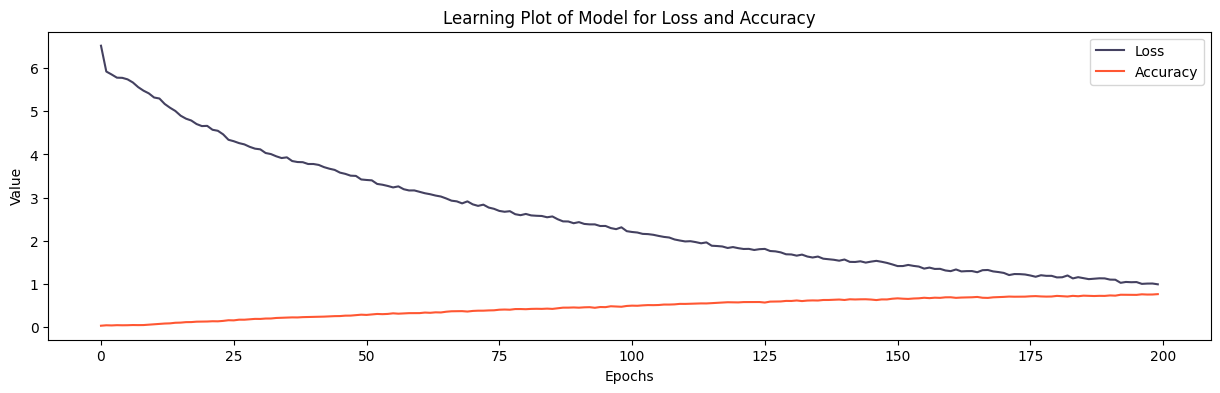

In [ ]:
#Plotting
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(15, 4))
plt.title("Learning Plot of Model for Loss and Accuracy")
plt.plot(history_df["loss"], color="#444160", label="Loss")
plt.plot(history_df["accuracy"], color="#ff5733", label="Accuracy")
plt.ylabel("Value")
plt.xlabel("Epochs")
plt.legend()
plt.savefig('learning_curves.png')

In [ ]:
#Generate lyrics
def lyrics_generator(model, starter, length, temperature=1.0):
    generated = starter
    seed = [mapping[char] for char in starter.split()]
    for _ in range(length):
        x_pred = np.reshape(seed, (1, len(seed))) / float(len(unique_chars))
        predictions = model.predict(x_pred, verbose=0)[0]
        predictions = np.asarray(predictions).astype('float64')
        predictions = np.log(predictions) / temperature
        exp_preds = np.exp(predictions)
        predictions = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, predictions, 1)
        next_index = np.argmax(probas)
        next_char = reverse_mapping[next_index]
        generated += ' ' + next_char
        seed = seed[1:] + [next_index]
    return generated

starter_sequence = " ".join(corpus[:length])
song = lyrics_generator(model, starter_sequence, 400)
print(song)

Ooh Ooh Ooh Ooh a storm is threatning My very life today If I do nt get some shelter Ooh yeah I m gon na fade away War children It s just a shot away it s just a shot today tears long long Oh craps upholstered ship craps today Baby fate Rican saints who can slave Cadillac hands today fate Cadillac can tears can long women English pain Jack today hot tears stained Flash pink tears Rican Baby upholstered Alright can Anastasia waiting girl flavor today pink tears very upholstered pink saints tears tears tears long tears Anastasia Making flavor can saints English Baby fire Pleased Pleased can saints today Under today saints heart saints brown upholstered hands can saints Come can As English tears Cadillac very English Flash Oh runs saints Oh can Cadillac pain No in after very stank yow information yow Oh hands English gas can saints Oh long upholstered upholstered saints can saints upholstered saints Well Making today life hands life can today Oh saints tears coal English hands today Tuesd